<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T1_P3_P4_EA_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import io
import random
import math
import numpy as np
import scipy, pylab

In [2]:
#cargar archivos de pesos
url_50 = 'https://raw.githubusercontent.com/DonRoboto/MOO_v1/main/knap_50.csv'
download_50 = requests.get(url_50).content
df_50 = pd.read_csv(io.StringIO(download_50.decode('utf-8')))

#cargar archivos de pesos
url_10000 = 'https://raw.githubusercontent.com/DonRoboto/MOO_v1/main/knap_10000.csv'
download_10000 = requests.get(url_10000).content
df_10000 = pd.read_csv(io.StringIO(download_10000.decode('utf-8')))

In [3]:
data_top_50 = df_50.columns

n_50 = int(data_top_50[0])
max_cap_50 = int(data_top_50[1])

profit_50=df_50.iloc[:, 0]
weight_50=df_50.iloc[:, 1]

print(n_50)
print(max_cap_50)


data_top_10000 = df_10000.columns

n_10000 = int(data_top_10000[0])
max_cap_10000 = int(data_top_10000[1])

profit_10000=df_10000.iloc[:, 0]
weight_10000=df_10000.iloc[:, 1]
print(n_10000)
print(max_cap_10000)

50
341045
10000
1000000


In [4]:
class Individuo():
        
    def __init__(self, items='', n_items='', max_cap=''):
      self.items=[]
      self.n_items=n_items
      self.max_cap=max_cap

      if items!='':
        self.items=items             
      else:
        #cromosomas variables
        c = random.randint(4, self.n_items)
        for i in range(c):
          pos = random.randint(0, self.n_items-1)
          
          if pos not in self.items:
            self.items.append(pos)


      while self.fittnes()>self.max_cap:
        self.items.pop()


    def fittnes(self):
      f = 0
      for i in range(len(self.items)):
        if self.n_items==50:
          f = f + weight_50[self.items[i]]
        if self.n_items==10000:
          f = f + weight_10000[self.items[i]]

      return f      

In [5]:
class Poblacion():

  def __init__(self, n='', n_items='', max_cap=''):
    self.p = []
    self.n_items=n_items
    self.max_cap=max_cap
    
    if n!='':
      for i in range(n):
        individuo = Individuo(items='', n_items=self.n_items, max_cap=self.max_cap)
        self.p.append(individuo)

  def cruza(self, ind_1, ind_2):
    len_1 = math.floor(len(ind_1.items)/2)
    len_2 = math.floor(len(ind_2.items)/2)

    crom_1 = []
    crom_2 = []

    crom_1 = ind_1.items[:len_1]
    crom_2 = ind_2.items[:len_2]

    for c1 in ind_2.items[len_2:]:
      if c1 not in crom_1:
        crom_1.append(c1)


    for c2 in ind_1.items[len_1:]:
      if c2 not in crom_2:
        crom_2.append(c2)

    h1 = Individuo(items=crom_1, n_items=self.n_items, max_cap=self.max_cap)       
    h2 = Individuo(items=crom_2, n_items=self.n_items, max_cap=self.max_cap)       

    return h1, h2


  def mutacion(self, ind_1):
    len_1 = len(ind_1.items)

    index = random.randint(0, len_1)
    pos = random.randint(0, self.n_items-1)

    ind_1.items[index-1]=pos
    ind_1.items = list(dict.fromkeys(ind_1.items))

    while ind_1.fittnes()>self.max_cap:
        ind_1.items.pop()




In [6]:
#ejecutar 10 veces
result = np.zeros((10, 24))

for n in range(10):
  #codigo principal
  pob_i = Poblacion(n=24, n_items=n_50, max_cap=max_cap_50)

  for g in range(100):
    pob_n = Poblacion(n_items=n_50, max_cap=max_cap_50)
    pob_aux = Poblacion(n_items=n_50, max_cap=max_cap_50)

    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes()>=pob_i.p[i+1].fittnes():
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1]) 

      #quenes serán padres
      pad_1 = Individuo(items='', n_items=n_50, max_cap=max_cap_50)
      pad_2 = Individuo(items='', n_items=n_50, max_cap=max_cap_50)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

      #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)

  j=0  
  for k in pob_n.p:
    result[n][j] = k.fittnes()
    j += 1
 

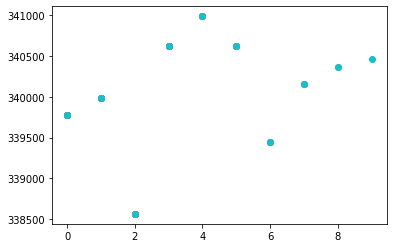

In [7]:
#graficar resultados
ax = pylab.subplot(111)

x=[]
y=[]
for j in range(10):
  x.append(j)
  y.append(np.max(result[j]))

  ax.scatter(x, y)

ax.figure.show()

In [8]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(np.max(result[k]))

print("mínimo: {}".format(np.nanmin(rf)))
print("máximo: {}".format(np.nanmax(rf)))
print("media: {}".format(np.nanmean(rf)))
print("mediana: {}".format(np.nanmedian(rf)))
print("desviación estándar: {}".format(np.nanstd(rf)))

mínimo: 338562.0
máximo: 340990.0
media: 340100.6
mediana: 340262.0
desviación estándar: 668.0018263448087


In [ ]:
#ejecutar 10 veces
result = np.zeros((10, 24))

for n in range(10):
  #codigo principal
  pob_i = Poblacion(n=24, n_items=n_10000, max_cap=max_cap_10000)

  for g in range(10):
    pob_n = Poblacion(n_items=n_10000, max_cap=max_cap_10000)
    pob_aux = Poblacion(n_items=n_10000, max_cap=max_cap_10000)

    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes()>=pob_i.p[i+1].fittnes():
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1]) 

      #quenes serán padres
      pad_1 = Individuo(items='', n_items=n_10000, max_cap=max_cap_10000)
      pad_2 = Individuo(items='', n_items=n_10000, max_cap=max_cap_10000)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

      #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)

  j=0  
  for k in pob_n.p:
    result[n][j] = k.fittnes()
    j += 1
 

In [ ]:
#graficar resultados
ax = pylab.subplot(111)

x=[]
y=[]
for j in range(10):
  x.append(j)
  y.append(np.max(result[j]))

  ax.scatter(x, y)

ax.figure.show()

In [ ]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(np.max(result[k]))

print("mínimo: {}".format(np.nanmin(rf)))
print("máximo: {}".format(np.nanmax(rf)))
print("media: {}".format(np.nanmean(rf)))
print("mediana: {}".format(np.nanmedian(rf)))
print("desviación estándar: {}".format(np.nanstd(rf)))